In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df_perinuclear = pd.read_pickle('/Users/apple/Desktop/DATA_590/cleaned_data/PAM194_Keratino_CytoPanel_1/pam194ObjPerinuclear_final.pkl')

In [3]:
df_perinuclear.head()

,ImageNumber,ObjectNumber,Metadata_Metadata_Cytokine,Metadata_Metadata_Dose,Metadata_Plate,Metadata_Well,Granularity_1_CorrActin,Granularity_1_CorrDNA2,Granularity_1_CorrGolgi,Granularity_1_CorrMito,...,RadialDistribution_MeanFrac_CorrNileRed_3of3,RadialDistribution_MeanFrac_CorrWGA_1of3,RadialDistribution_MeanFrac_CorrWGA_2of3,RadialDistribution_MeanFrac_CorrWGA_3of3,Texture_Contrast_CorrActin_3_00_256,Texture_Contrast_CorrDNA2_3_00_256,Texture_Contrast_CorrGolgi_3_00_256,Texture_Contrast_CorrMito_3_00_256,Texture_Contrast_CorrNileRed_3_00_256,Texture_Contrast_CorrWGA_3_00_256
0,1,1,IFNg,33,Plate 1,B10,39.085821,65.349797,29.429464,30.085395,...,0.966626,1.107394,1.002816,0.978826,56.093190,1294.657706,53.277778,99.007168,41.057348,305.080645
1,1,2,IFNg,33,Plate 1,B10,40.965732,52.025753,26.951641,12.008458,...,0.809355,0.773479,1.120512,0.975138,91.093182,469.270455,1106.593182,614.602273,204.086364,1441.497727
2,1,3,IFNg,33,Plate 1,B10,26.494443,23.842541,31.133865,16.847527,...,0.985965,0.992277,1.270288,0.835928,107.951641,1454.008636,1642.792746,781.062176,73.214162,3096.525043
3,1,4,IFNg,33,Plate 1,B10,38.945234,37.122993,23.805090,18.204408,...,0.935769,0.732077,1.047311,1.022251,53.644444,1569.964444,311.783704,345.182222,41.334815,977.817778
4,1,5,IFNg,33,Plate 1,B10,33.282087,71.535983,23.379080,23.507941,...,0.942655,1.240005,1.174742,0.846785,241.794816,428.285097,767.876890,532.056156,77.267819,2478.924406


In [4]:
unique_pairs = df_perinuclear[['Metadata_Metadata_Cytokine', 'Metadata_Metadata_Dose']].drop_duplicates().reset_index().drop('index', axis = 1)

In [5]:
unique_pairs['class'] = unique_pairs.index

In [6]:
unique_pairs

,Metadata_Metadata_Cytokine,Metadata_Metadata_Dose,class
0,IFNg,33,0
1,IFNg,11,1
2,FGF,100,2
3,FGF,33,3
4,FGF,11,4
5,IFNg,100,5
6,untr,0,6
7,TNFa,33,7
8,TNFa,11,8
9,EGF,100,9


In [8]:
def assign_class(row, unique_pairs):
    pair = (row['Metadata_Metadata_Cytokine'], row['Metadata_Metadata_Dose'])
    class_label = unique_pairs.loc[(unique_pairs['Metadata_Metadata_Cytokine'] == pair[0]) & (unique_pairs['Metadata_Metadata_Dose'] == pair[1]), 'class'].values
    if len(class_label) > 0:
        return class_label[0]
    else:
        return None

# Apply the custom function to each row in the main dataframe
df_perinuclear['Class'] = df_perinuclear.apply(lambda row: assign_class(row, unique_pairs), axis=1)

In [9]:
df_perinuclear.head()

,ImageNumber,ObjectNumber,Metadata_Metadata_Cytokine,Metadata_Metadata_Dose,Metadata_Plate,Metadata_Well,Granularity_1_CorrActin,Granularity_1_CorrDNA2,Granularity_1_CorrGolgi,Granularity_1_CorrMito,...,RadialDistribution_MeanFrac_CorrWGA_1of3,RadialDistribution_MeanFrac_CorrWGA_2of3,RadialDistribution_MeanFrac_CorrWGA_3of3,Texture_Contrast_CorrActin_3_00_256,Texture_Contrast_CorrDNA2_3_00_256,Texture_Contrast_CorrGolgi_3_00_256,Texture_Contrast_CorrMito_3_00_256,Texture_Contrast_CorrNileRed_3_00_256,Texture_Contrast_CorrWGA_3_00_256,Class
0,1,1,IFNg,33,Plate 1,B10,39.085821,65.349797,29.429464,30.085395,...,1.107394,1.002816,0.978826,56.093190,1294.657706,53.277778,99.007168,41.057348,305.080645,0
1,1,2,IFNg,33,Plate 1,B10,40.965732,52.025753,26.951641,12.008458,...,0.773479,1.120512,0.975138,91.093182,469.270455,1106.593182,614.602273,204.086364,1441.497727,0
2,1,3,IFNg,33,Plate 1,B10,26.494443,23.842541,31.133865,16.847527,...,0.992277,1.270288,0.835928,107.951641,1454.008636,1642.792746,781.062176,73.214162,3096.525043,0
3,1,4,IFNg,33,Plate 1,B10,38.945234,37.122993,23.805090,18.204408,...,0.732077,1.047311,1.022251,53.644444,1569.964444,311.783704,345.182222,41.334815,977.817778,0
4,1,5,IFNg,33,Plate 1,B10,33.282087,71.535983,23.379080,23.507941,...,1.240005,1.174742,0.846785,241.794816,428.285097,767.876890,532.056156,77.267819,2478.924406,0


In [10]:
columns = df_perinuclear.columns
df_perinuclear_updated = df_perinuclear[columns[6:]]
df_perinuclear_updated.head()

,Granularity_1_CorrActin,Granularity_1_CorrDNA2,Granularity_1_CorrGolgi,Granularity_1_CorrMito,Granularity_1_CorrNileRed,Granularity_1_CorrWGA,Granularity_2_CorrActin,Granularity_2_CorrDNA2,Granularity_2_CorrGolgi,Granularity_2_CorrMito,...,RadialDistribution_MeanFrac_CorrWGA_1of3,RadialDistribution_MeanFrac_CorrWGA_2of3,RadialDistribution_MeanFrac_CorrWGA_3of3,Texture_Contrast_CorrActin_3_00_256,Texture_Contrast_CorrDNA2_3_00_256,Texture_Contrast_CorrGolgi_3_00_256,Texture_Contrast_CorrMito_3_00_256,Texture_Contrast_CorrNileRed_3_00_256,Texture_Contrast_CorrWGA_3_00_256,Class
0,39.085821,65.349797,29.429464,30.085395,44.114031,22.509906,0.003287,26.423181,0.268834,5.465537,...,1.107394,1.002816,0.978826,56.093190,1294.657706,53.277778,99.007168,41.057348,305.080645,0
1,40.965732,52.025753,26.951641,12.008458,45.012237,31.272657,5.789921,23.713483,15.874150,16.521128,...,0.773479,1.120512,0.975138,91.093182,469.270455,1106.593182,614.602273,204.086364,1441.497727,0
2,26.494443,23.842541,31.133865,16.847527,41.216969,33.950756,5.468793,59.028529,15.182432,20.155878,...,0.992277,1.270288,0.835928,107.951641,1454.008636,1642.792746,781.062176,73.214162,3096.525043,0
3,38.945234,37.122993,23.805090,18.204408,35.257958,36.451333,3.720866,49.278255,27.993834,27.957626,...,0.732077,1.047311,1.022251,53.644444,1569.964444,311.783704,345.182222,41.334815,977.817778,0
4,33.282087,71.535983,23.379080,23.507941,38.806145,29.618878,4.550290,9.710360,13.389387,6.197391,...,1.240005,1.174742,0.846785,241.794816,428.285097,767.876890,532.056156,77.267819,2478.924406,0


In [11]:
df_perinuclear_updated.isna().sum()

Granularity_1_CorrActin                          0
Granularity_1_CorrDNA2                           0
Granularity_1_CorrGolgi                          0
Granularity_1_CorrMito                          70
Granularity_1_CorrNileRed                        0
Granularity_1_CorrWGA                           70
Granularity_2_CorrActin                          0
Granularity_2_CorrDNA2                           0
Granularity_2_CorrGolgi                          0
Granularity_2_CorrMito                          70
Granularity_2_CorrNileRed                        0
Granularity_2_CorrWGA                           70
Granularity_3_CorrActin                          0
Granularity_3_CorrDNA2                           0
Granularity_3_CorrGolgi                          0
Granularity_3_CorrMito                          70
Granularity_3_CorrNileRed                        0
Granularity_3_CorrWGA                           70
Granularity_4_CorrActin                          0
Granularity_4_CorrDNA2         

In [12]:
df_perinuclear_cleaned = df_perinuclear_updated.dropna()

In [14]:
X = df_perinuclear_cleaned.drop('Class', axis =1)
y = df_perinuclear_cleaned['Class']

In [15]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Initialize KMeans model
kmeans = KMeans(n_clusters=11)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Extract cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_
distances = kmeans.inertia_

In [32]:
residuals_list = []
for i in range(10,31):
    kmeans = KMeans(n_clusters=i)

    # Fit the model to the scaled data
    kmeans.fit(X_scaled)

    # Extract cluster centers and labels
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    distances = kmeans.inertia_
    residuals_list.append(distances)

In [33]:
print(len(residuals_list))

21


In [ ]:
kmeans = KMeans(n_clusters=)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Extract cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_
distances = kmeans.inertia_
residuals_list.append(distances)

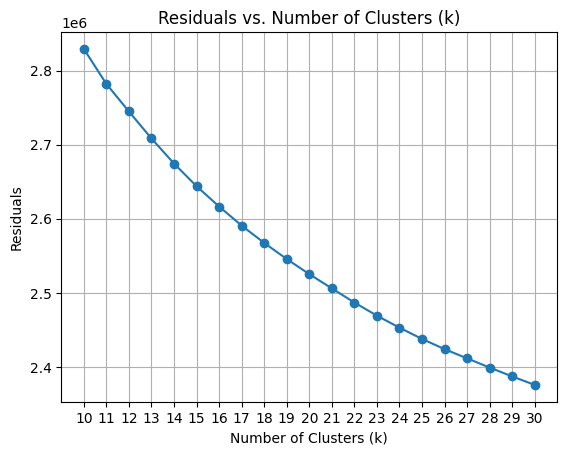

In [34]:
# List of number of clusters (k) from 10 to 31
k_values = list(range(10, 31))

# Plot residuals vs. number of clusters
plt.plot(k_values, residuals_list, marker='o', linestyle='-')
plt.title('Residuals vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Residuals')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [25]:
df_perinuclear_cleaned['Labels'] = labels

/Users/apple/miniconda3/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
temp = df_perinuclear_cleaned[['Class', 'Labels']]
x = temp[temp['Class'] == 0]

In [31]:
x['Labels'].value_counts()

3     639
0     516
8     482
1     433
10    367
7     272
6     115
4     110
9      82
2      44
5      33
Name: Labels, dtype: int64

In [ ]:
def custom_train_test_split(df, class_column, test_size=0.3, random_state=42):
    train_indices = []
    test_indices = []
    
    np.random.seed(random_state)
    
    # Iterate over each class
    for class_label in df[class_column].unique():
        # Get indices for rows with the current class label
        class_indices = df.index[df[class_column] == class_label].tolist()
        
        # Shuffle the indices
        np.random.shuffle(class_indices)
        
        # Calculate the number of samples for training and testing
        num_samples = len(class_indices)
        num_train_samples = int(num_samples * (1 - test_size))
        
        # Assign indices to training and testing sets
        train_indices.extend(class_indices[:num_train_samples])
        test_indices.extend(class_indices[num_train_samples:])
    
    # Create training and testing sets
    train_set = df.loc[train_indices]
    test_set = df.loc[test_indices]
    
    return train_set, test_set

In [ ]:
# Assuming main_df is your dataframe and 'Class' is the column containing class labels
train_set, test_set = custom_train_test_split(df_perinuclear_cleaned, 'Class', test_size=0.3, random_state=42)

In [ ]:
# Print the shapes of the training and testing sets to verify
print("Training set shape:", train_set.shape)
print("Testing set shape:", test_set.shape)